In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
import matplotlib.style as style
style.use(['seaborn-talk', 'seaborn-colorblind'])
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.grid'] = False

In [43]:
df = pd.read_csv('USvideos.csv')

In [44]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [45]:
appearings = df.groupby('channel_title').count().sort_values('views', ascending=False)

In [103]:
appearings.head()

,video_id,trending_date,title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
channel_title,,,,,,,,,,,,,,,
Refinery29,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
NFL,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
Vox,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
ESPN,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
Netflix,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80


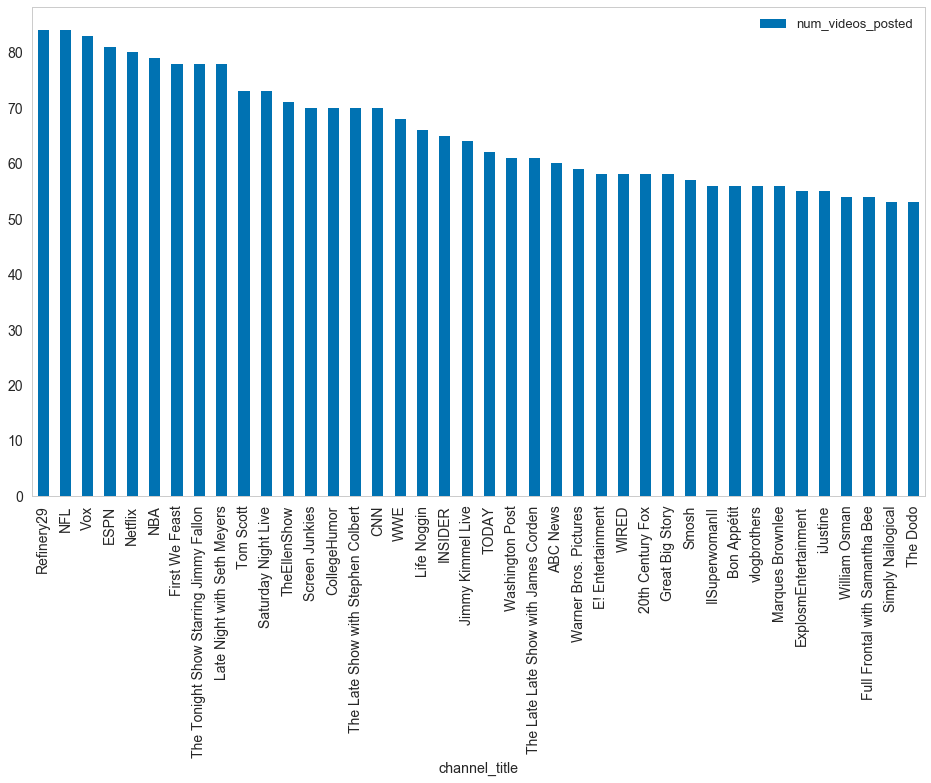

In [101]:
appearings[['video_id']].rename(columns={'video_id': 'num_videos_posted'}).head(40).plot(kind='bar', figsize=(16,9))

In [51]:
views_mean = df.groupby('channel_title').mean().sort_values('views', ascending=False)

In [93]:
views_mean.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
YouTube Spotlight,24.0,7.120897e+07,1.805680e+06,919745.000000,537624.818182,0.0,0.0,0.0
LuisFonsiVEVO,10.0,5.347388e+07,1.667143e+06,75303.700000,95342.700000,0.0,0.0,0.0
Kylie Jenner,22.0,3.251798e+07,0.000000e+00,0.000000,0.000000,1.0,1.0,0.0
Ed Sheeran,10.0,2.355911e+07,1.006778e+06,16357.705882,48508.117647,0.0,0.0,0.0
Disney•Pixar,1.0,2.150697e+07,3.664791e+05,9371.500000,42805.600000,0.0,0.0,0.0


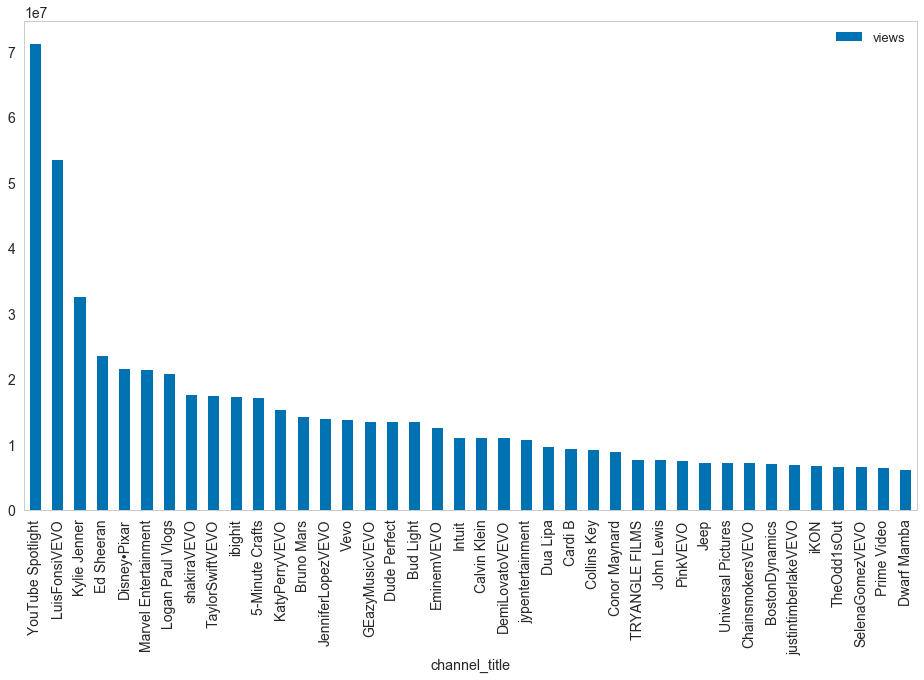

In [87]:
views_mean[['views']].head(40).plot(kind='bar', figsize=(16,9))

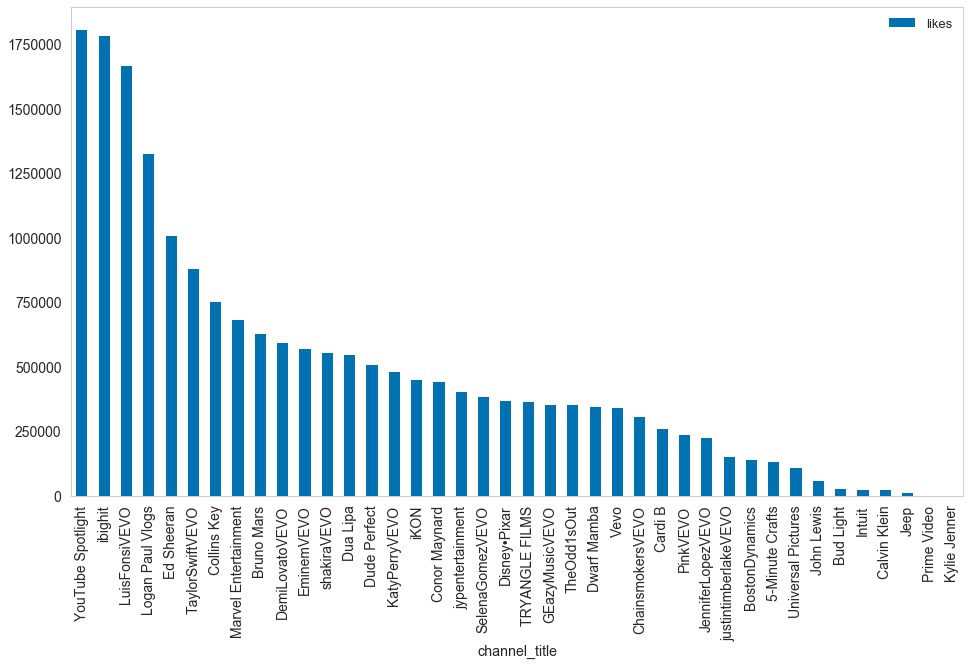

In [53]:
views_mean[['likes']].head(40).sort_values('likes', ascending=False).plot(kind='bar', figsize=(16,9))

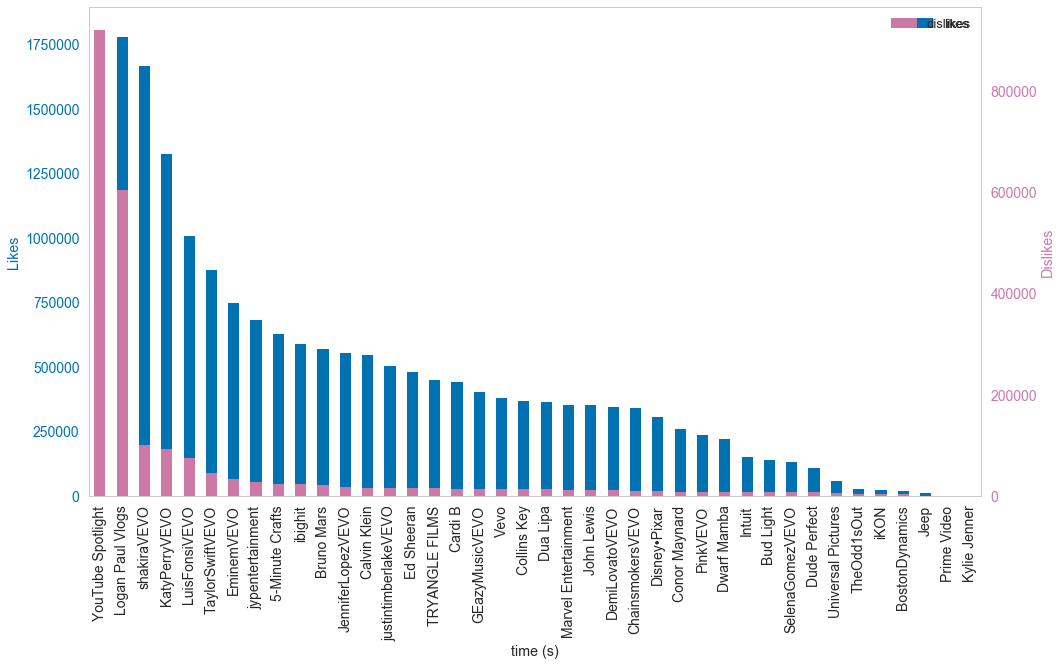

In [99]:
ax1 = views_mean[['likes']].head(40).sort_values('likes', ascending=False).plot(kind='bar', figsize=(16,9) )

ax1.set_xlabel('time (s)')

ax1.set_ylabel('Likes', color='C0')
ax1.tick_params('y', colors='C0')

ax2 = ax1.twinx()

views_mean[['dislikes']].head(40).sort_values('dislikes', ascending=False).plot(kind='bar', figsize=(16,9), color='C3', ax=ax2)

ax2.set_ylabel('Dislikes', color='C3')
ax2.tick_params('y', colors='C3')

plt.show()

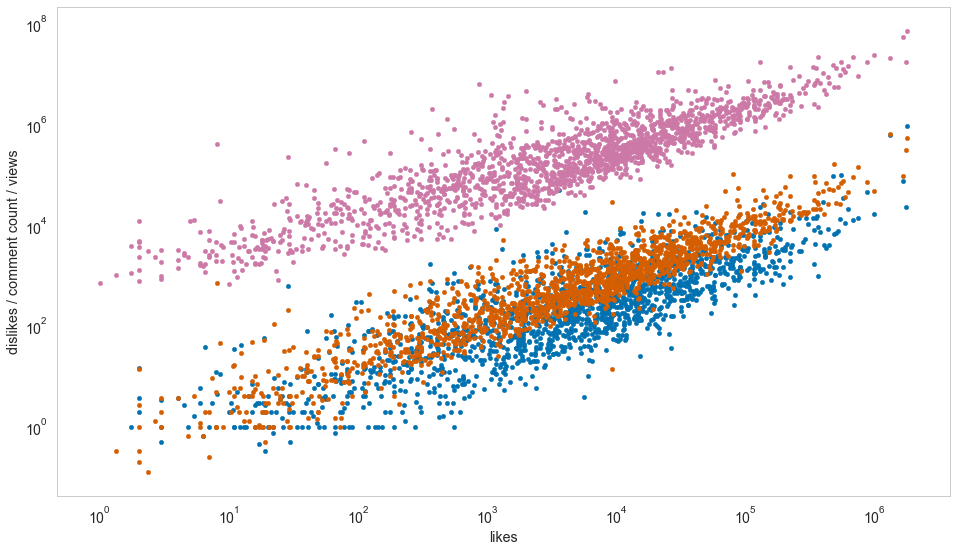

In [98]:
ax1 = scatter[['likes', 'dislikes']].plot(kind='scatter', x='likes', y='dislikes', figsize=(16,9), loglog=True)
scatter[['likes', 'comment_count']].plot(kind='scatter', x='likes', y='comment_count', figsize=(16,9), color='C2', ax=ax1, loglog=True)
scatter[['likes', 'views']].plot(kind='scatter', x='likes', y='views', figsize=(16,9), color='C3', ax=ax1, loglog=True)

ax1.set_ylabel('dislikes / comment count / views');